<a href="https://colab.research.google.com/github/AnupDesai/Customer-Segmentation-using-K-means-Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SEGMENTATION USING K-MEANS** **CLUSTERING**


Submitted By,


1.   Anup A Desai

     Computer Engineering, North Carolina State University

     



In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

print("Pandas version: ", pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Numpy version: ", np.__version__)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


Pandas version:  1.1.5
Seaborn version:  0.11.2
Numpy version:  1.19.5


**STEP 1 : READING DATASET USING PANDAS** **AS DATAFRAME**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Vaish035/mallcustomers/master/Mall_Customers.csv', encoding='unicode_escape')
data.head()
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


The necessary libraries have been imported to perform the mathematical computations and visualize the obtained data using various graphs.

Google Colab allows us to import ".CSV" files directly from the url, as such Mall_Customers.csv has been imported which serves as the dataset.

We have used the pandas library for the data frames and ensure that the dataset is imported accurately and take a brief look at the rows and columns of the dataset.

In [ ]:
data.info()
data.drop(["CustomerID"], axis = 1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 
* Using the command '.info' we get the much needed information about the  dataset such as the number of columns,total number of entries and so on.This is quite necessary to know so as to perform the operations on the dataset.

* The "Customer ID" column has been dropped from using the ".drop" command as
  it does not provide any insight into the data.


**STEP 2 : DATA** **VISUALIZATION**

Female    112
Male       88
Name: Gender, dtype: int64


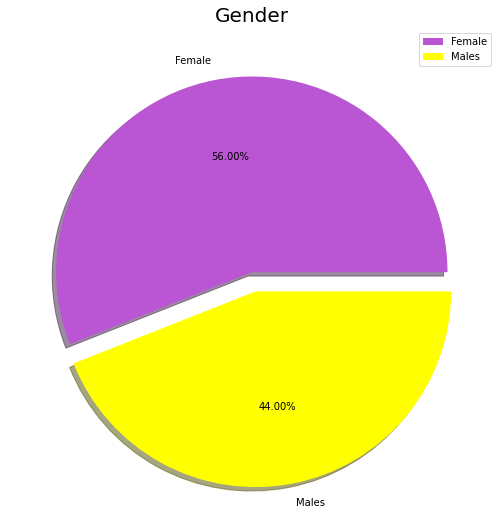

In [ ]:
labels = ['Female', 'Males']
size = data['Gender'].value_counts()
colors = ['mediumorchid', 'yellow']
explode = [0, 0.1]
print(size)

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()




   
Taking a good look at the above pie chart which explains about the distribution of Gender in the Mall. The Female populate is in the lead with a share of 56% whereas the Male populate has a share of 44%, The female count is 112 and the male count is 88.So, it is clear that there are more female customers than male customers to the mall.




 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Age distribution')

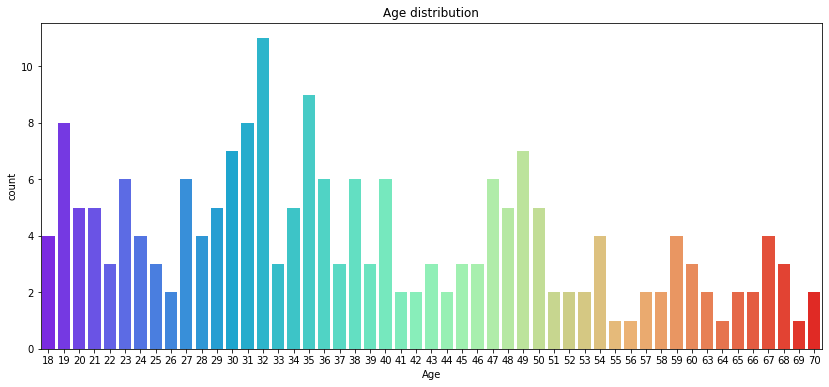

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data['Age'],palette='rainbow')
plt.title("Age distribution")

The above Graph depicts a more interactive analysis about the distribution of each Age Group in the Mall:

By looking at the above graph, It can be seen that the Ages from 27 to 39 are very much frequent although there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.There are equal number of Visitors in the Mall for the Age 18 and 67. People of Age 55, 56, 64, 69 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.So,target customers whom the mall should focus must be on Age Group say 55-65.

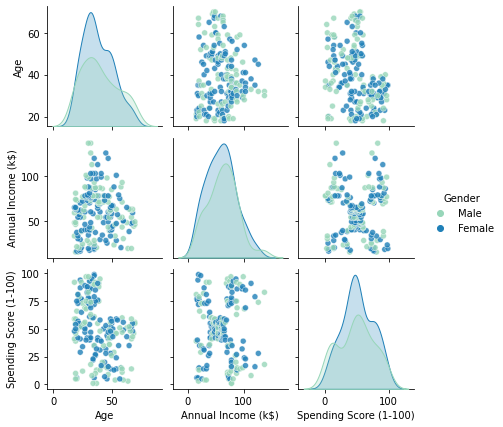

In [ ]:
sns.pairplot(data, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

We,then analyze the correlation between the numeric parameters. Here we have used the "pairplot" seaborn function. Our insight was to see whether there is a difference between gender, as we are going to set the hue parameter to get different colors for points belonging to female or customers. We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gender vs Age')

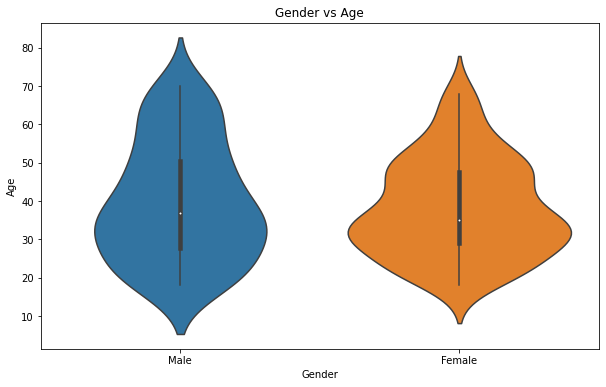

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data.Gender, data.Age)
plt.title("Gender vs Age")


The above Graph depicts a more interactive analysis which shows the co-relation bewteen Gender and Age of the customers:

By looking at the above graph, It can be seen through the "violinplot" function that the distribution of Male graph shows that most of the customers who are males are between the range of 20-40 years.The Female graph depicts that there are larger set of female populate as the customers and more concentrated between the range of 30-50 years. So, the target customers where the mall has to work are male customers who are either below 20 years or above 50 years of age so that they are drawn more towards the mall

Text(0.5, 1.0, 'Gender vs Spending Scores')

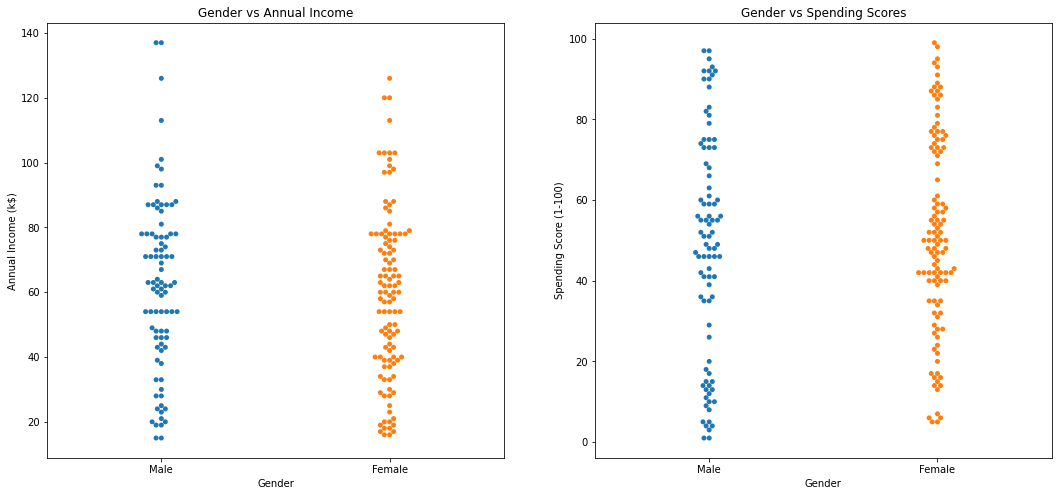

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.swarmplot(x=data['Gender'],y=data['Annual Income (k$)'])
plt.title('Gender vs Annual Income')
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 2)
sns.swarmplot(x=data['Gender'],y=data['Spending Score (1-100)'])
plt.title('Gender vs Spending Scores')






* A Bivariate Analysis between the Gender and the Annual Income is plotted using "swarmplot" function from Searborn library to better visualize the Income of the different Genders.There are more number of males who get paid more than females. But, the number of males and females are equal in number when it comes to low annual income.

* Similarly,Bi-variate Analysis between Gender and Spending Score shows clearly that the most of the males have a Spending Score of around 25,000 USD to 70,000 USD whereas the Females have a spending score of around 35,000 USD to 75,000 USD. which again points to the fact that women are Shopping Leaders and spend more on shopping at the mall.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



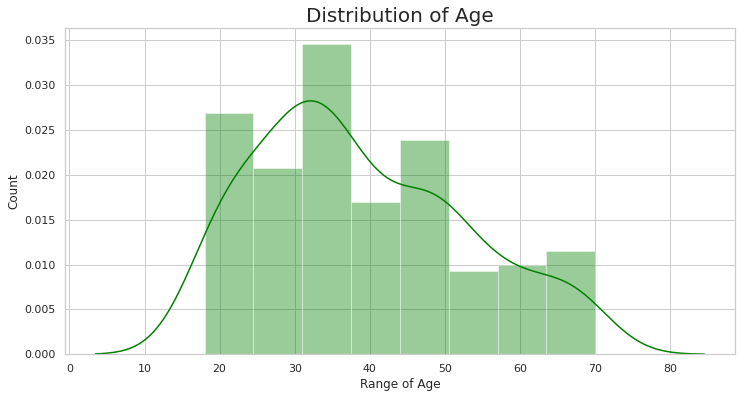

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'green')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()



The above graph depicts the distribution of Age of the cutsomers in a "distplot".We have used the above graph to show that Ages of the customers are distributed unevenly as compared to that of the Annual Income and Spending Scores of the customers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Count')

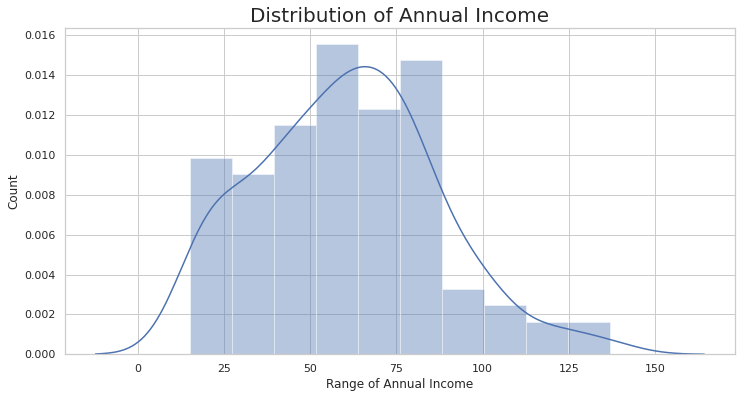

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')





* This is a chart to better explain distribution the Income level as stand alone,there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15 USD to 137K US Dollars. There are more Customers in the Mall who have their Annual Income in range of 50k-70k USD accompanied by customers having around 80k USD

* The Annual Income of the customers as we can see is more evenly distributed than the Age distribution



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



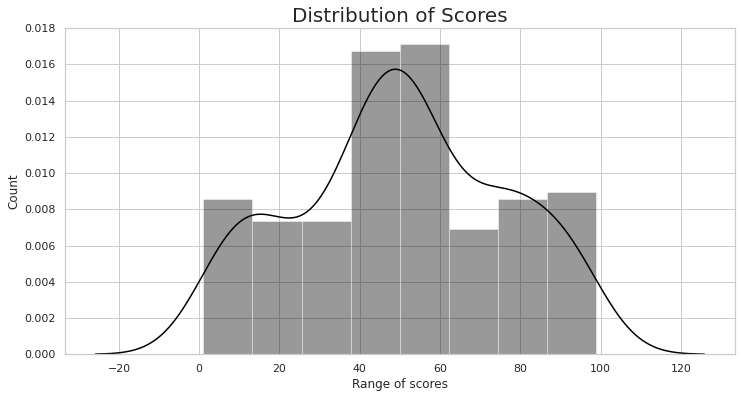

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Scores', fontsize = 20)
plt.xlabel('Range of scores')
plt.ylabel('Count')
plt.show()



* It is very Important to have a deep intuition and dig insights about the Spending Score of the Customers visiting the Mall.Taking a glance at the graph we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting, there are customers having spending score between 0-10 and also 80-90, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.  

* The Spending scores of the customers as we can see is more evenly distributed than the Age distribution as well as the Annual Income distribution.As,such we decided to scale these three parameters using Standard Scaler, before we apply K-means clustering











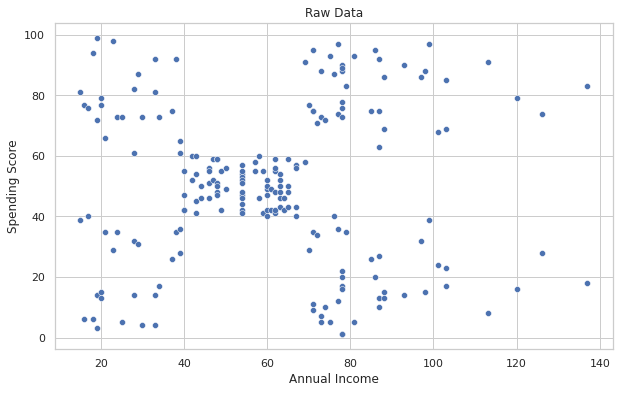

In [ ]:

labels = ['Annual Income', 'Spending Score']
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'])
plt.title('Raw Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



The above graph depicts the relationship between Annual Income and Spending Score.It is clear from the above scatterplot that customers who earn 40k-60k USD are more concentrated in the area of spending score between the range of 40-60.If we consider customers having Annual Income of 20k-40k USD have scattered spending scores,some are erratic spenders who have spending scores of as high as 100 and some are very careful spenders who have scores as low as 10.
there is a same situation with customers having high annual income.

**STEP 3 : STANDARDIZATION** **AND SCALING**

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
x = data.iloc[:,1:4]
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Here, we have considered the three parameters Age,Annual Income and Spending Score to scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

The values of the three parameters Age,Annual Income and Spending Scores have been scaled using Standard Scaler function which has been imported from Sklearn library.This function standardizes the data such that all the values are internally consistent; that is, each data type has the same content and format. Standardized values are useful for tracking data that isn't easy to compare otherwise.

**STEP 4 : DIMENSIONALITY REDUCTION** **USING PCA**

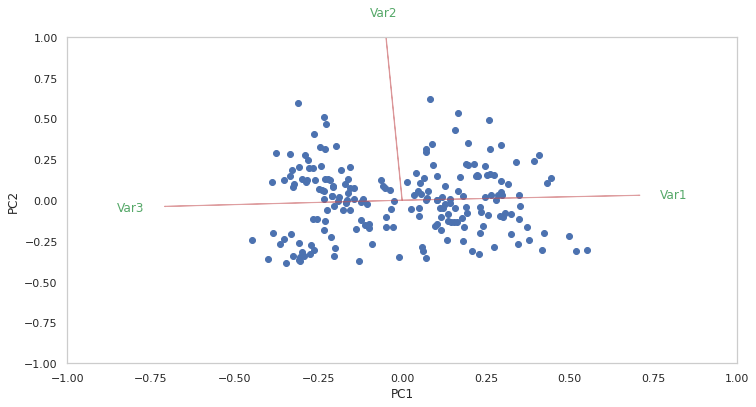

In [ ]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(x_scaled)
# Transform samples using the PCA fit
pca_2d = pca.transform(x_scaled)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_2d[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()



* We have applied Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved. 

* Then, we have considered three features from the dataset as the useful columns. Customer ID is not a useful feature which has been dropped earlier and It does not appear in the final dataset.

* During the fitting process, the model learns some quantities from the data the "components" and "variance".

* We have represented this using a type of scatter plot called biplot by coding our custom function. Each point is represented by its score regarding the principal components. It is helpful to understand the reduced dimensions of the data. It also helps us discover relationships between the principal components and the original variables.

* In the graph Var1 is the Spending Score,Var2 is the Age and Var3 is the Annual Income. We can observe that Annual Income as well as Spending Score as the two most important components.









**STEP 5 : SELECTING NUMBER** **OF CLUSTERS**

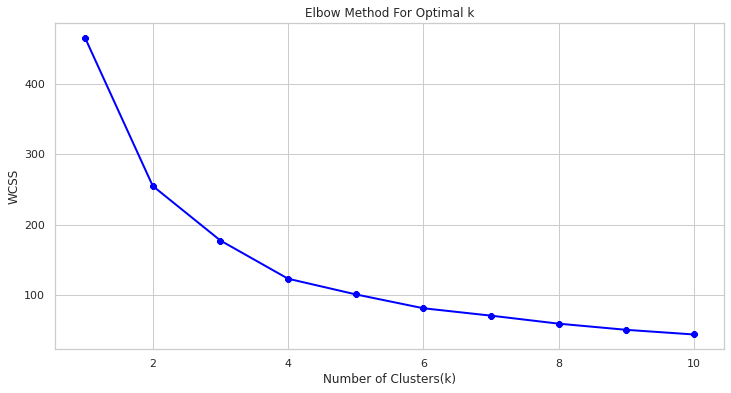

In [ ]:
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(pca_2d)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()



* We have to fix the numbers of clusters to use.There are several direct methods to perform this, among them, we have used the elbow method.  

* The Elbow method emphasizes on how the total WSS(Within-cluster sum of square) varies with the number of clusters.We have then computed k-means by using the Kmeans function which we have imported from sklearn.cluster, for a range of different values of k. Lastly,  the total WSS is calculated. 


 * The curve WSS vs number of clusters is plotted.Finally,the elbow or bend of the plot is located. This point is considered to be the appropriate number of clusters which is our case '5'.



 






**STEP 6 : K-MEANS** **CLUSTERING**

In [ ]:
##Fitting kmeans to the dataset with k=5
kmnew=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmnew = kmnew.fit_predict(pca_2d)
print(y_kmnew)

labels=kmnew.labels_
print()


[3 3 2 3 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 3 2 2 2 3 4 2 3 4 2 2 2 2
 2 4 4 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 4 4 2 2 2 2 2
 4 4 4 4 4 2 4 0 4 4 4 4 1 4 1 0 1 0 4 0 4 4 1 4 1 0 1 4 4 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]



* To perform the clustering K means clustering has been used.The main intuitive is to select "k" centers, one for each cluster, initialize those centers randomly and  pass some  points that we believe are the centers. Then, the Euclidean distance between each point and the cluster centers is calculated. 

* We assign the points to the cluster center where the distance is minimum,followed by the recalculation of the new cluster center. The point that is in the middle of each cluster as the new center is selected and this process is continued, calculate the distance, assign to cluster, calculate new centers.The process is terminated when the clusters do not move anymore.

* The appropriate number of clusters has been choosen as 5.In the above cell the code describes fiiting of the K means to our dataset to predict the clusters of all the 200 customers.
   

* ".fit_predict" function has been used to fit the K means to our dataset.The  input to the function is the pca_2d data.We obtain the output as an array,pertaining values ranging from 0 to 4.









In [ ]:
labels_=kmnew.labels_

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels,labels_)


from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]
accuracy=(np.trace(cm2) / np.sum(cm2))*100
print('Accuracy score:' , accuracy)

ModuleNotFoundError: ignored

In [ ]:
#Visualizing the clusters for k=5
fig, ax = plt.subplots(figsize = (8, 6))


plt.scatter(pca_2d[y_kmnew==0,0],pca_2d[y_kmnew==0,1],s=50, c='orange',label='Cluster1')
plt.scatter(pca_2d[y_kmnew==1,0],pca_2d[y_kmnew==1,1],s=50, c='salmon',label='Cluster2')
plt.scatter(pca_2d[y_kmnew==2,0],pca_2d[y_kmnew==2,1],s=50, c='violet',label='Cluster3')
plt.scatter(pca_2d[y_kmnew==3,0],pca_2d[y_kmnew==3,1],s=50, c='yellowgreen',label='Cluster4')
plt.scatter(pca_2d[y_kmnew==4,0],pca_2d[y_kmnew==4,1],s=50, c='dodgerblue',label='Cluster5')

plt.scatter(kmnew.cluster_centers_[:,0], kmnew.cluster_centers_[:,1],s=500,marker='.', c='black', alpha=0.7, label='Centroids')

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')

plt.title('Distribution of 5 clusters', size=16)
plt.legend()
plt.show() 





Visualizing the clusters for k=5

The scatterplot of the clusters and their respective centroids has been plotted and the following inferences can be dervied.

 
 1. The orange color(Cluster 1) represents the customers who have average  
    income and are also average spenders.These customers do not over-spend, 
    whatever the offer might they will not spend high, as such their needs
    are already well catered.    

 2.  The salmon color(Cluster 2) represents the customers who earn more but 
    are highly considerate spenders.These customers are very reserved on
    what they spend as such, a database can be collected about their
    specific interests and notifications about the availability of 
    those products can be sent to these customers. 


 3. The violet color (cluster 3) represents the customers who have low income
    and spend the least.These customers are highly mindful of their spendings 
    and will only spend if there it is necessary.To get the most out from these
    customers a database can be created to record, on what commodities they 
    spend and according to their needs the availability,prices and discounts
    should be offered.


    
 4. The green color (cluster 4) represents the customers who have higher
    income and spend the most.These customers should be targeted positively.
    These customers will provide us high income with their large spendings.
    Special treatment for these customers could be provided to these people.
    Premier membership cards and special access to the products could be
    given so that the customers feel special and remain in a loyal base.



 5. The dodgerblue color (cluster 5) represents the customers who have low 
    income but spend higher or have high spending scores.These are erratic
    spenders who can be targeted very easily.If the availability of the required
    goods is made known to these customers then there are high possibilities
    returns will be higher.
    






